In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

hb = pd.read_csv("haberman.csv")


In [118]:
print(hb.head)
print(hb.shape)

<bound method NDFrame.head of      age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2

[306 rows x 4 columns]>
(306, 4)


In [119]:
print(hb.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [120]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


In [121]:
print(hb['status'].value_counts())

print(hb.describe())

print("Median is " +str(np.median(hb['nodes'])))


1    225
2     81
Name: status, dtype: int64
              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000
Median is 1.0


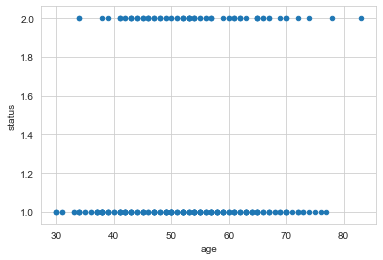

In [122]:
#2D Scatter Plot:

hb.plot(kind="scatter", x="age", y="status")
plt.show()

Not useful at all

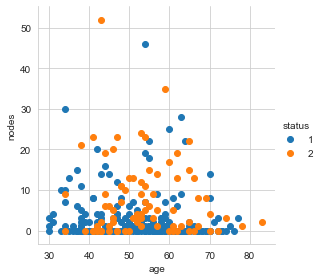

In [123]:
#Using Seaborn

sns.set_style("whitegrid")
sns.FacetGrid(hb, hue="status", height=4) \
    .map(plt.scatter, "age", "nodes") \
    .add_legend()
plt.show()

Much better. However, we can't immediately spot anything remarkable. Only thing worth mentioning is that people with age more than 50 having more than 10 nodes are unlikely to survive (Marked by Orange)

C:\Users\Antrix\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Antrix\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


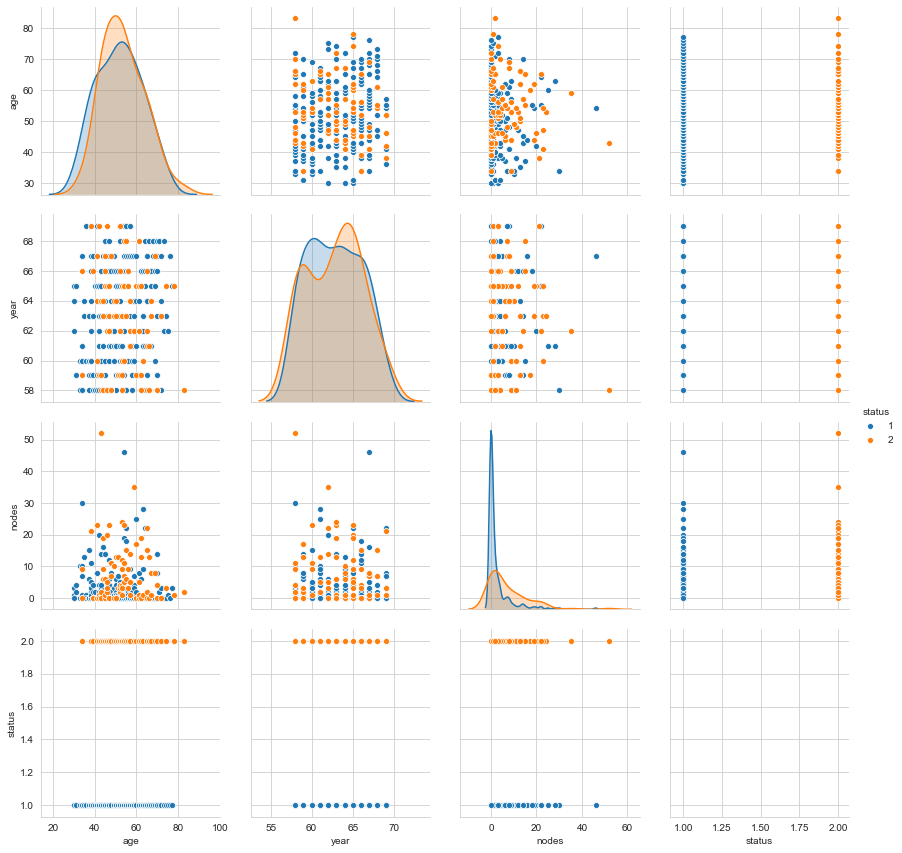

In [124]:
#Pair Plots

plt.close();
sns.set_style("whitegrid");
sns.pairplot(hb, hue="status", height=3);
plt.show()

Cant make out much from the graphs as well. Year doesn't seem to make any significant difference to the survival rate.
Age and Nodes look promising.

There is a significant overlap between the values in the remaining graphs. Can't draw any conclusions from them.



In [125]:
#Single Features. Using Histograms/CDFs and PDFs


alive = hb.loc[hb["status"] == 1]
dead = hb.loc[hb["status"] == 2]

print(alive, dead)

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
298   73    68      0       1
300   74    63      0       1
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1

[225 rows x 4 columns]      age  year  nodes  status
7     34    59      0       2
8     34    66      9       2
24    38    69     21       2
34    39    66      0       2
43    41    60     23       2
..   ...   ...    ...     ...
286   70    58      4       2
293   72    63      0       2
299   74    65      3       2
304   78    65      1       2
305   83    58      2       2

[81 rows x 4 columns]


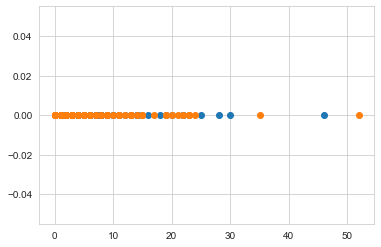

In [126]:
plt.plot(alive["nodes"], np.zeros_like(alive["nodes"]), "o")
plt.plot(dead["nodes"], np.zeros_like(dead["nodes"]), "o")
plt.show()

C:\Users\Antrix\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


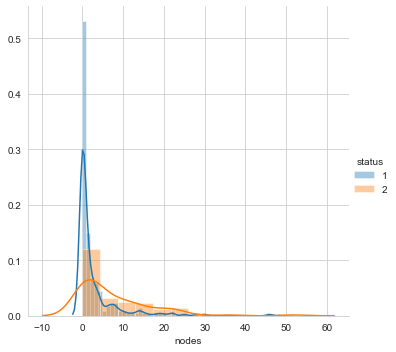

In [127]:
#Making a histogram

sns.FacetGrid(hb, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

Well, people having zero cancerous nodes are much more likely to survive. Who would've guessed? :p
However, there is still a slight overlap, meaning some people having no cancerous nodes still didn't survive.

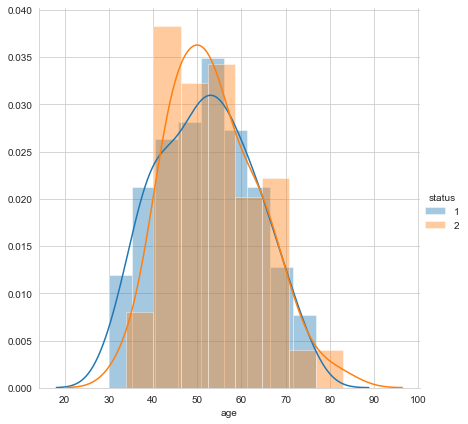

In [112]:
sns.FacetGrid(hb, hue="status", size=6) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

Significant overlap in ages as well. Though most of the patients that didn't survive were around 50 years old. 

Some younger patients in the age bracket of 20 - 40 also survived. 

However, it doesn't seem to offer much insight as to why other people of similar age did/did not survive. 



[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


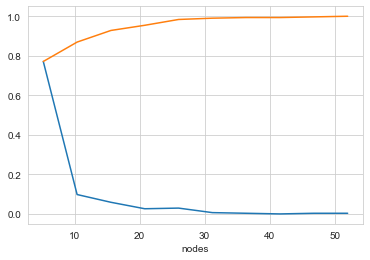

In [113]:
counts, bin_edges = np.histogram(hb['nodes'], bins=10, 
                                 density = True)
pdf = counts/sum(counts)
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel("nodes")
plt.show()

Cumulative Distribution

Roughly 77% percent of the people who survivced had nodes between 0 - 5.2


Interesting result.

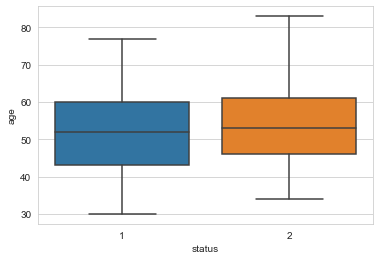

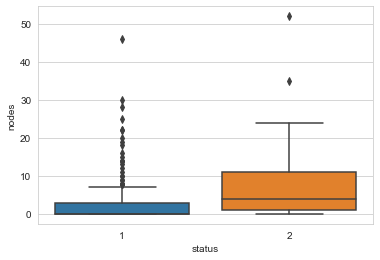

In [114]:
#Box plots and Violin plots


sns.boxplot(x="status", y="age", data=hb)
plt.show()
sns.boxplot(x="status", y="nodes", data=hb)
plt.show()


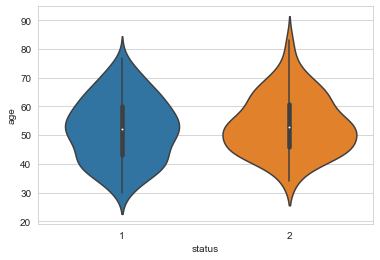

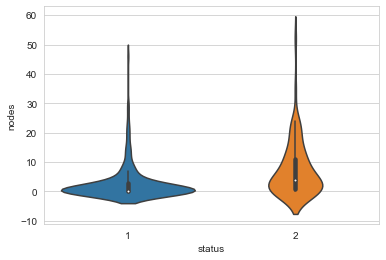

In [115]:
sns.violinplot(x="status", y="age", data=hb, height=10)
plt.show()
sns.violinplot(x="status", y="nodes", data=hb, height=10)
plt.show()

1) Maximum number of patients that survived had 0 nodes. However, it is important to note that a few patients did not survive despite having 0 nodes. 

2) The chance of survival on the basis of age is unclear.


3) The death rate of people in the range of 40-60 is high.


C:\Users\Antrix\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


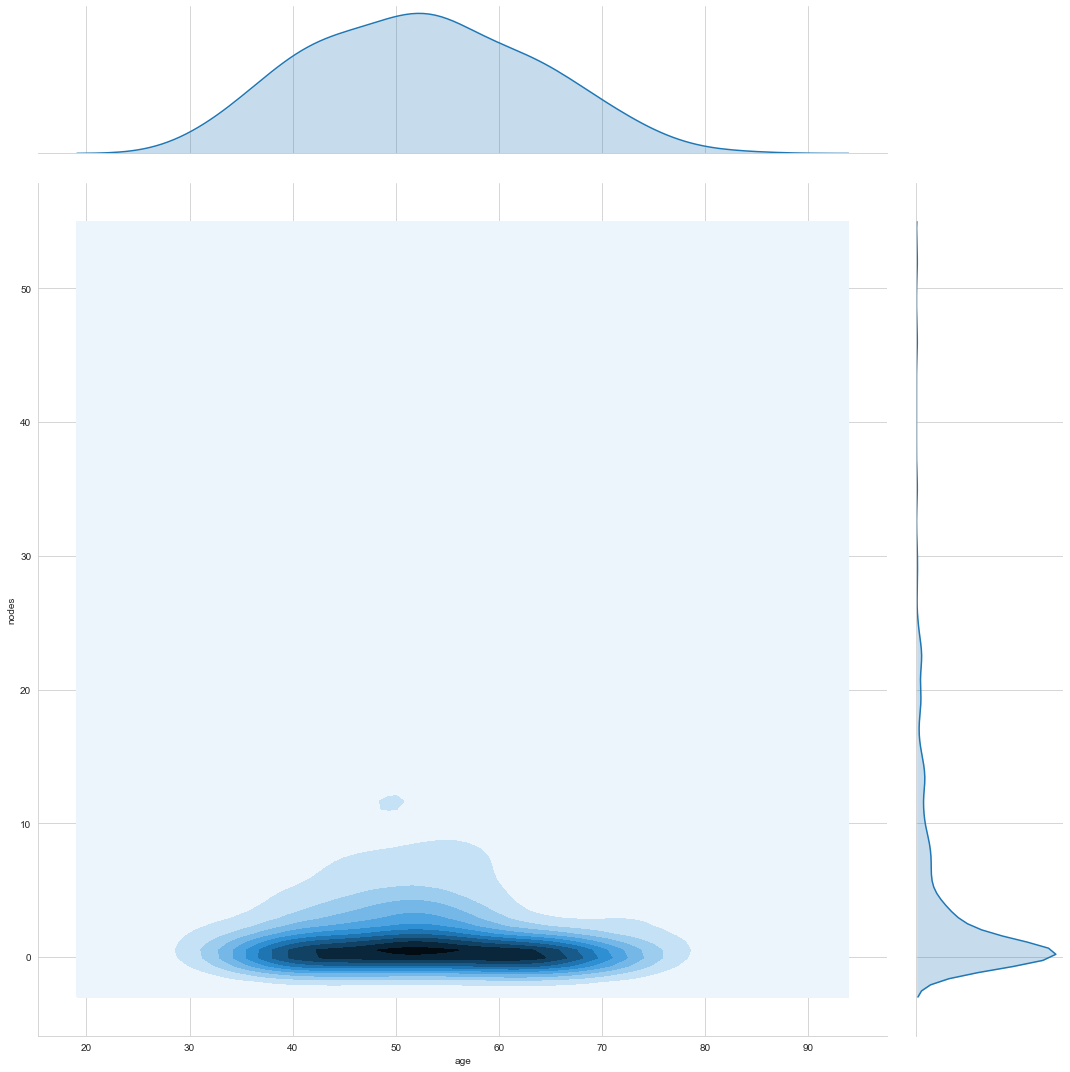

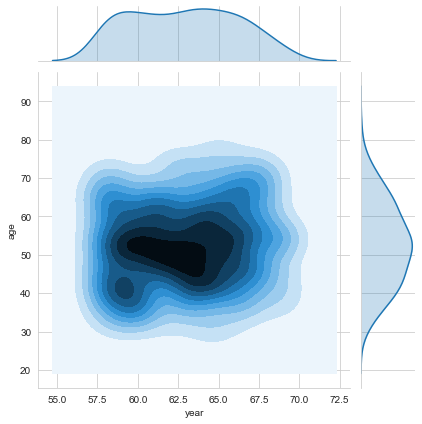

In [116]:
# Contour Plot

sns.jointplot(x = "age", y = "nodes", data = hb, kind = "kde", size = 15)
plt.show()

sns.jointplot(x = "year", y = "age", data = hb, kind = "kde")
plt.show()

Difficult to draw any conclusions from the graphs. People aged 35 are more likely to survive. But so are people aged more than 70. Cannot say anything for certain. 

The death rate was the highest with the age range in between 40 - 60 as already established. It is particularly high in the years 60 - 65. 




Overall thoughts: It is a good exercise in EDA. However, it is difficult to draw any concrete conclusions regarding survival of a particular patient.

Age and Year have little correlation with the survival and death rates. 

The number of nodes was the sole factor having some relevance with the survival chances. But nothing conclusive as some people who had 0 nodes still did not survive.